In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/home/yashkrishan/Downloads/student-alcohol-consumption/student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Approach of the model

A beginner approach of converting all the text values into numeric values by mapping and grouping them in categories with numeric values

In [3]:
#new feature Total Alcohol Consumption, which is sum of Dalc and Walc
data['TAlc'] = data['Dalc']+data['Walc']

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TAlc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,3


In [5]:
#affect of total alcohol consumptions on grade 'G3'
data[['TAlc','G3']].groupby(['TAlc'], as_index=False).mean().sort_values(by='TAlc',ascending=True)

,TAlc,G3
0,2,10.806667
1,3,10.272727
2,4,10.366667
3,5,10.555556
4,6,9.000000
5,7,10.235294
6,8,10.444444
7,9,9.750000
8,10,10.666667


In [6]:
#grouping the absences 
data['absences_gr'] = pd.cut(data['absences'], 5)

In [7]:
data[['absences_gr','G3']].groupby(['absences_gr'], as_index=False).mean().sort_values(by='absences_gr',ascending=True)

,absences_gr,G3
0,"(-0.075, 15.0]",10.450276
1,"(15.0, 30.0]",10.142857
2,"(30.0, 45.0]",9.500000
3,"(45.0, 60.0]",9.500000
4,"(60.0, 75.0]",9.000000


In [8]:
data['sex'] = data['sex'].map({'F':1,'M':0})

In [9]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr
0,GP,1,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,2,"(-0.075, 15.0]"
1,GP,1,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,2,"(-0.075, 15.0]"
2,GP,1,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,5,"(-0.075, 15.0]"
3,GP,1,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,2,"(-0.075, 15.0]"
4,GP,1,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,3,"(-0.075, 15.0]"


In [10]:
data[['sex','G3']].groupby(['sex'], as_index=False).mean().sort_values(by='sex',ascending=True)

,sex,G3
0,0,10.914439
1,1,9.966346


In [11]:
data['age_gr'] = pd.cut(data['age'], 3)
data[['age_gr','G3']].groupby(['age_gr'], as_index=False).mean().sort_values(by='age_gr',ascending=True)

,age_gr,G3
0,"(14.993, 17.333]",10.834507
1,"(17.333, 19.667]",9.245283
2,"(19.667, 22.0]",11.400000


In [12]:
data.loc[ data['age'] <= 17, 'age'] = 0
data.loc[(data['age'] > 17) & (data['age'] <= 20), 'age'] = 1
data.loc[(data['age'] > 20), 'age'] = 3

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [13]:
data['address'] = data['address'].map({"U":1, "R":0})

In [14]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,1,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,1,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,1,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,1,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,1,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [15]:
data['famsize'] = data['famsize'].map({"GT3":1, "LE3":0})
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,1,1,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,1,1,T,1,1,at_home,other,...,1,1,3,4,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,1,0,T,1,1,at_home,other,...,2,3,3,10,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,1,1,T,4,2,health,services,...,1,1,5,2,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,1,1,T,3,3,other,other,...,1,2,5,4,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [16]:
data[['Pstatus','G3']].groupby(['Pstatus'], as_index=False).mean().sort_values(by='Pstatus',ascending=True)

,Pstatus,G3
0,A,11.195122
1,T,10.324859


In [17]:
data['Pstatus'] = data['Pstatus'].map({"A":1, "T":0})
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,1,1,1,4,4,at_home,teacher,...,1,1,3,6,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,1,1,0,1,1,at_home,other,...,1,1,3,4,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,1,0,0,1,1,at_home,other,...,2,3,3,10,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,1,1,0,4,2,health,services,...,1,1,5,2,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,1,1,0,3,3,other,other,...,1,2,5,4,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [18]:
data[['Mjob','G3']].groupby(['Mjob'], as_index=False).mean().sort_values(by='G3',ascending=True)

,Mjob,G3
0,at_home,9.152542
2,other,9.822695
3,services,11.019417
4,teacher,11.051724
1,health,12.147059


In [19]:
data['Mjob'] = data['Mjob'].map({"at_home":0, "other":1, "services":2, "teacher":3, "health":4})
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,1,1,1,4,4,0,teacher,...,1,1,3,6,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,1,1,0,1,1,0,other,...,1,1,3,4,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,1,0,0,1,1,0,other,...,2,3,3,10,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,1,1,0,4,2,4,services,...,1,1,5,2,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,1,1,0,3,3,1,other,...,1,2,5,4,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [20]:
data[['Fjob','G3']].groupby(['Fjob'], as_index=False).mean().sort_values(by='G3',ascending=True)

,Fjob,G3
0,at_home,10.150000
2,other,10.193548
3,services,10.297297
1,health,11.611111
4,teacher,11.965517


In [21]:
data['Fjob'] = data['Fjob'].map({"at_home":0, "other":1, "services":2, "health":3, "teacher":4})
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,1,1,1,4,4,0,4,...,1,1,3,6,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,1,1,0,1,1,0,1,...,1,1,3,4,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,1,0,0,1,1,0,1,...,2,3,3,10,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,1,1,0,4,2,4,2,...,1,1,5,2,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,1,1,0,3,3,1,1,...,1,2,5,4,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [22]:
data[['reason','G3']].groupby(['reason'], as_index=False).mean().sort_values(by='G3',ascending=True)

,reason,G3
0,course,9.820690
1,home,10.256881
3,reputation,11.142857
2,other,11.166667


In [23]:
data['reason'] = data['reason'].map({"course":0, "home":1, "reputation":2, "other":3})
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,1,1,1,4,4,0,4,...,1,1,3,6,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,1,1,0,1,1,0,1,...,1,1,3,4,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,1,0,0,1,1,0,1,...,2,3,3,10,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,1,1,0,4,2,4,2,...,1,1,5,2,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,1,1,0,3,3,1,1,...,1,2,5,4,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [24]:
data[['guardian','G3']].groupby(['guardian'], as_index=False).mean().sort_values(by='G3',ascending=True)

,guardian,G3
2,other,9.062500
1,mother,10.483516
0,father,10.688889


In [25]:
data['guardian'] = data['guardian'].map({"other":0, "mother":1, "father":2})
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,1,1,1,4,4,0,4,...,1,1,3,6,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,1,1,0,1,1,0,1,...,1,1,3,4,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,1,0,0,1,1,0,1,...,2,3,3,10,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,1,1,0,4,2,4,2,...,1,1,5,2,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,1,1,0,3,3,1,1,...,1,2,5,4,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [26]:
data[['traveltime','G3']].groupby(['traveltime'], as_index=False).mean().sort_values(by='G3',ascending=True)

,traveltime,G3
3,4,8.750000
2,3,9.260870
1,2,9.906542
0,1,10.782101


In [27]:
data[['studytime','G3']].groupby(['studytime'], as_index=False).mean().sort_values(by='G3',ascending=True)

,studytime,G3
0,1,10.047619
1,2,10.171717
3,4,11.259259
2,3,11.400000


In [28]:
data[['failures','G3']].groupby(['failures'], as_index=False).mean().sort_values(by='G3',ascending=True)

,failures,G3
3,3,5.687500
2,2,6.235294
1,1,8.120000
0,0,11.253205


In [29]:
data[['schoolsup','G3']].groupby(['schoolsup'], as_index=False).mean().sort_values(by='G3',ascending=True)

,schoolsup,G3
1,yes,9.431373
0,no,10.561047


In [30]:
data['schoolsup'] = data['schoolsup'].map({"no":1, "yes":0})

In [31]:
data[['famsup','G3']].groupby(['famsup'], as_index=False).mean().sort_values(by='G3',ascending=True)

,famsup,G3
1,yes,10.272727
0,no,10.640523


In [32]:
data['famsup'] = data['famsup'].map({"no":1, "yes":0})

In [33]:
data[['paid','G3']].groupby(['paid'], as_index=False).mean().sort_values(by='G3',ascending=True)

,paid,G3
0,no,9.985981
1,yes,10.922652


In [34]:
data['paid'] = data['paid'].map({"yes":1, "no":0})

In [35]:
data[['activities','G3']].groupby(['activities'], as_index=False).mean().sort_values(by='G3',ascending=True)

,activities,G3
0,no,10.340206
1,yes,10.487562


In [36]:
data['activities'] = data['activities'].map({"yes":1, "no":0})

In [37]:
data[['nursery','G3']].groupby(['nursery'], as_index=False).mean().sort_values(by='G3',ascending=True)

,nursery,G3
0,no,9.950617
1,yes,10.535032


In [38]:
data['nursery'] = data['nursery'].map({"yes":1, "no":0})

In [39]:
data[['higher','G3']].groupby(['higher'], as_index=False).mean().sort_values(by='G3',ascending=True)

,higher,G3
0,no,6.800
1,yes,10.608


In [40]:
data['higher'] = data['higher'].map({"yes":1, "no":0})

In [41]:
data[['internet','G3']].groupby(['internet'], as_index=False).mean().sort_values(by='G3',ascending=True)

,internet,G3
0,no,9.409091
1,yes,10.617021


In [42]:
data['internet'] = data['internet'].map({"yes":1, "no":0})

In [43]:
data[['romantic','G3']].groupby(['romantic'], as_index=False).mean().sort_values(by='G3',ascending=True)

,romantic,G3
1,yes,9.575758
0,no,10.836502


In [44]:
data['romantic'] = data['romantic'].map({"no":1, "yes":0})

In [45]:
data[['absences_gr','G3']].groupby(['absences_gr'], as_index=False).mean().sort_values(by='absences_gr',ascending=True)

,absences_gr,G3
0,"(-0.075, 15.0]",10.450276
1,"(15.0, 30.0]",10.142857
2,"(30.0, 45.0]",9.500000
3,"(45.0, 60.0]",9.500000
4,"(60.0, 75.0]",9.000000


In [46]:
data.loc[ data['absences'] <= 15, 'absences'] = 0
data.loc[(data['absences'] > 15) & (data['absences'] <= 30), 'absences'] = 1
data.loc[(data['absences'] > 30)& (data['absences'] <= 45),'absences'] = 2
data.loc[(data['absences'] > 45)& (data['absences'] <= 60),'absences'] = 3
data.loc[(data['absences'] > 60),'absences'] = 4


data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,TAlc,absences_gr,age_gr
0,GP,1,1,1,1,1,4,4,0,4,...,1,1,3,0,5,6,6,2,"(-0.075, 15.0]","(17.333, 19.667]"
1,GP,1,0,1,1,0,1,1,0,1,...,1,1,3,0,5,5,6,2,"(-0.075, 15.0]","(14.993, 17.333]"
2,GP,1,0,1,0,0,1,1,0,1,...,2,3,3,0,7,8,10,5,"(-0.075, 15.0]","(14.993, 17.333]"
3,GP,1,0,1,1,0,4,2,4,2,...,1,1,5,0,15,14,15,2,"(-0.075, 15.0]","(14.993, 17.333]"
4,GP,1,0,1,1,0,3,3,1,1,...,1,2,5,0,6,10,10,3,"(-0.075, 15.0]","(14.993, 17.333]"


In [47]:
data[['absences','G3']].groupby(['absences'], as_index=False).mean().sort_values(by='G3',ascending=True)

,absences,G3
4,4,9.000000
2,2,9.500000
3,3,9.500000
1,1,10.142857
0,0,10.450276


In [48]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2,random_state=4)

In [49]:
train = train.drop(['school','G1','G2','absences_gr','age_gr'],axis = 1)

In [50]:
test = test.drop(['school','G1','G2','absences_gr','age_gr'],axis = 1)

In [51]:
train.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,TAlc
96,0,0,0,1,0,4,3,2,1,2,...,1,3,3,3,1,1,4,0,15,2
238,1,0,0,1,0,2,1,0,2,0,...,1,2,1,1,1,1,3,0,11,2
336,1,1,0,1,1,3,1,2,0,1,...,1,5,4,3,1,2,5,0,13,3
18,0,0,1,1,0,3,2,2,2,0,...,1,5,5,5,2,4,5,1,5,6
247,0,3,1,1,0,3,1,2,2,3,...,0,5,4,5,5,5,1,1,8,10


In [52]:
X_train = train.drop('G3', axis=1)
Y_train = train['G3']

X_pred = test.drop('G3',axis=1)

#### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression as lr
rf = lr()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_pred)
acc_rv = round(rf.score(X_train, Y_train) * 100, 2)
acc_rv

-287.37

In [54]:
from sklearn import metrics
res = {}

mae=metrics.mean_absolute_error(test['G3'], Y_pred)
res['mae'] = mae

evs=metrics.explained_variance_score(test['G3'], Y_pred)
res['evs'] =  evs

msr=metrics.mean_squared_error(test['G3'], Y_pred)
res['msr'] = msr

r2_score=metrics.r2_score(test['G3'], Y_pred)
res['r2_score'] = r2_score

mar=metrics.mean_absolute_error(test['G3'], Y_pred)
res['mar'] = mar

mdae=metrics.median_absolute_error(test['G3'], Y_pred)
res['mdae'] = mdae

res

{'evs': -3.8200548214663748,
 'mae': 8.180079314212463,
 'mar': 8.180079314212463,
 'mdae': 5.7816455696202524,
 'msr': 111.51427806040698,
 'r2_score': -3.911160887552043}

In [55]:
#Prediction error plot for the Linear Regression algo
from yellowbrick.regressor import PredictionError, ResidualsPlot

rf = lr()
visualizer = PredictionError(rf)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_train, Y_train) 
g = visualizer.poof()     
g

<Figure size 800x550 with 1 Axes>

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f83dbaf6400>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

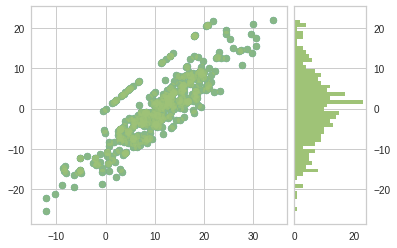

In [56]:
#Residual Plot for the linear regression model
plot = ResidualsPlot(rf)
plot.fit(X_train,Y_train)
plot.score(X_train,Y_train)
plot

#### Lasso Algo

In [57]:
from sklearn.linear_model import Lasso as ls
rf = ls()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_pred)
acc_rv = round(rf.score(X_train, Y_train) * 100, 2)
acc_rv

0.25

In [58]:
#errors for the Lasso algo

from sklearn import metrics
res = {}

mae=metrics.mean_absolute_error(test['G3'], Y_pred)
res['mae'] = mae

evs=metrics.explained_variance_score(test['G3'], Y_pred)
res['evs'] =  evs

msr=metrics.mean_squared_error(test['G3'], Y_pred)
res['msr'] = msr

r2_score=metrics.r2_score(test['G3'], Y_pred)
res['r2_score'] = r2_score

mar=metrics.mean_absolute_error(test['G3'], Y_pred)
res['mar'] = mar

mdae=metrics.median_absolute_error(test['G3'], Y_pred)
res['mdae'] = mdae

res

{'evs': 0.002794534592371667,
 'mae': 3.580251637424915,
 'mar': 3.580251637424915,
 'mdae': 2.5127345844504028,
 'msr': 22.98042515942426,
 'r2_score': -0.01207277834991749}

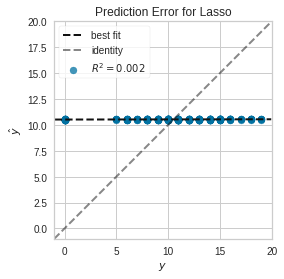

In [59]:
#Prediction Error plot for the Lasso
rf = ls()
visualizer = PredictionError(rf)

visualizer.fit(X_train, Y_train)  
visualizer.score(X_train, Y_train) 
g = visualizer.poof()     
g

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f83db92c3c8>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

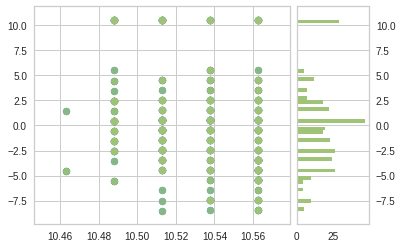

In [60]:
#Residual Plot for the lasso

plot = ResidualsPlot(rf)
plot.fit(X_train,Y_train)
plot.score(X_train,Y_train)
plot

#### Ridge Regression

In [61]:
from sklearn.linear_model import Ridge as r
rf = r()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_pred)
acc_rv = round(rf.score(X_train, Y_train) * 100, 2)
acc_rv

22.89

In [62]:
#Errors in Ridge

from sklearn import metrics
res = {}

mae=metrics.mean_absolute_error(test['G3'], Y_pred)
res['mae'] = mae

evs=metrics.explained_variance_score(test['G3'], Y_pred)
res['evs'] =  evs

msr=metrics.mean_squared_error(test['G3'], Y_pred)
res['msr'] = msr

r2_score=metrics.r2_score(test['G3'], Y_pred)
res['r2_score'] = r2_score

mar=metrics.mean_absolute_error(test['G3'], Y_pred)
res['mar'] = mar

mdae=metrics.median_absolute_error(test['G3'], Y_pred)
res['mdae'] = mdae

res

{'evs': 0.1817497602065844,
 'mae': 3.3876580975231882,
 'mar': 3.3876580975231882,
 'mdae': 2.517251297929885,
 'msr': 18.588851706103362,
 'r2_score': 0.1813349552057647}

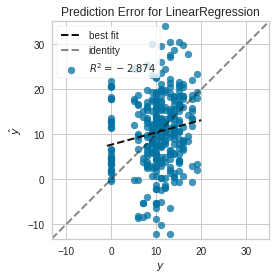

In [63]:
#Prediction Error for Ridge

rf = lr()
visualizer = PredictionError(rf)

visualizer.fit(X_train, Y_train)  
visualizer.score(X_train, Y_train) 
g = visualizer.poof()     
g

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f83db75cb70>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

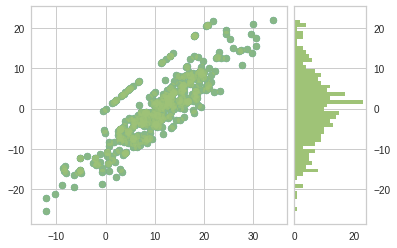

In [64]:
#Residual Plot for the Ridge

plot = ResidualsPlot(rf)
plot.fit(X_train,Y_train)
plot.score(X_train,Y_train)
plot

## The above dataset was cleaned a bit and all the categorical datas were converted into numerical values. The data can be more cleaned and noise free as clearly seen by all the various metrics which checked the predictions from all the three algorithms applied. 


## - From the three algos selected, the Lasso algorithms works the best for the data, having minimum errors while linear regression works the worst.